## CUSTOMER ANALYSIS FOR RETAIL

## Business Problem 
#### A Retail store is required to analyze the day-to-day transactions and keep a track of its customer spread across various locations  along with their purchases/returns across various categories.

   #### Create a report and display the below calculated metrics, reports and inferences.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 1.Merge the datasets Customers,Product Hierarchy and Transactions as Customer_Final.Ensure to keep all customers who have done transaction with usand select the join type accordingly. 

In [2]:
cust = pd.read_csv("D:\Python\Python Foundation Case Study 1 - Retail Case Study\Customer.csv")
cust

,customer_Id,DOB,Gender,city_code
0,268408,2/1/1970,M,4.0
1,269696,7/1/1970,F,8.0
2,268159,8/1/1970,F,8.0
3,270181,10/1/1970,F,2.0
4,268073,11/1/1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [3]:
prod_cat=pd.read_csv("D:\Python\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv")
prod_cat

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [4]:
tran=pd.read_csv("D:\Python\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv")
tran

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [5]:
transaction=pd.merge(left=tran,right=prod_cat,left_on=[tran.prod_cat_code,tran.prod_subcat_code],right_on=[prod_cat.prod_cat_code,prod_cat.prod_sub_cat_code],how='outer').drop(['key_0','key_1'],axis=1)
transaction

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,1,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,1,Clothing,1,Women
2,73713102191,268867,15-02-2014,1,1,1,714,74.970,788.970,MBR,1,Clothing,1,Women
3,57134739558,270625,14-02-2014,1,1,5,595,312.375,3287.375,TeleShop,1,Clothing,1,Women
4,79536458466,271944,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,1,Clothing,1,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,31795262740,275166,1/2/2011,1,4,4,531,223.020,2347.020,e-Shop,4,Bags,1,Mens
23049,85848725285,271131,1/2/2011,1,4,5,1043,547.575,5762.575,e-Shop,4,Bags,1,Mens
23050,12933894691,272706,31-01-2011,1,4,5,361,189.525,1994.525,MBR,4,Bags,1,Mens
23051,6442732971,273698,30-01-2011,1,4,1,1470,154.350,1624.350,e-Shop,4,Bags,1,Mens


In [6]:
customer_final=pd.merge(left=cust,right=transaction,left_on=cust.customer_Id,right_on=transaction.cust_id).drop('key_0',axis=1)
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,2/1/1970,M,4.0,63314547725,268408,26-04-2012,1,1,1,806,84.630,890.630,Flagship store,1,Clothing,1,Women
1,268408,2/1/1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,5,Books,7,Fiction
2,268408,2/1/1970,M,4.0,12644501524,268408,14-08-2012,4,4,3,321,101.115,1064.115,TeleShop,4,Bags,4,Women
3,268408,2/1/1970,M,4.0,56844530655,268408,14-10-2012,1,2,5,1175,616.875,6491.875,MBR,2,Footwear,1,Mens
4,268408,2/1/1970,M,4.0,56902862040,268408,30-01-2013,9,3,5,868,455.700,4795.700,e-Shop,3,Electronics,9,Cameras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop,6,Home and kitchen,12,Tools
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,1,Clothing,3,Kids
23050,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.700,3248.700,e-Shop,5,Books,12,Academic
23051,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR,2,Footwear,1,Mens


### 2.a Get  the column names and their corresponding data types

In [7]:
customer_final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code_x', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat_code_y', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [8]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_Id        23053 non-null  int64  
 1   DOB                23053 non-null  object 
 2   Gender             23044 non-null  object 
 3   city_code          23045 non-null  float64
 4   transaction_id     23053 non-null  int64  
 5   cust_id            23053 non-null  int64  
 6   tran_date          23053 non-null  object 
 7   prod_subcat_code   23053 non-null  int64  
 8   prod_cat_code_x    23053 non-null  int64  
 9   Qty                23053 non-null  int64  
 10  Rate               23053 non-null  int64  
 11  Tax                23053 non-null  float64
 12  total_amt          23053 non-null  float64
 13  Store_type         23053 non-null  object 
 14  prod_cat_code_y    23053 non-null  int64  
 15  prod_cat           23053 non-null  object 
 16  prod_sub_cat_code  230

### 2.b Top/Bottom 10 observations.

In [9]:
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,2/1/1970,M,4.0,63314547725,268408,26-04-2012,1,1,1,806,84.630,890.630,Flagship store,1,Clothing,1,Women
1,268408,2/1/1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,5,Books,7,Fiction
2,268408,2/1/1970,M,4.0,12644501524,268408,14-08-2012,4,4,3,321,101.115,1064.115,TeleShop,4,Bags,4,Women
3,268408,2/1/1970,M,4.0,56844530655,268408,14-10-2012,1,2,5,1175,616.875,6491.875,MBR,2,Footwear,1,Mens
4,268408,2/1/1970,M,4.0,56902862040,268408,30-01-2013,9,3,5,868,455.700,4795.700,e-Shop,3,Electronics,9,Cameras
5,268408,2/1/1970,M,4.0,19516063887,268408,7/9/2012,10,3,4,650,273.000,2873.000,e-Shop,3,Electronics,10,Audio and video
6,268408,2/1/1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop,6,Home and kitchen,10,Kitchen
7,268408,2/1/1970,M,4.0,16688203936,268408,12/7/2011,10,6,5,777,407.925,4292.925,Flagship store,6,Home and kitchen,10,Kitchen
8,268408,2/1/1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store,2,Footwear,4,Kids
9,268408,2/1/1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store,4,Bags,1,Mens


In [10]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
23043,270476,25-12-1992,F,3.0,85475160771,270476,9/8/2011,5,3,5,1354,710.850,7480.850,Flagship store,3,Electronics,5,Computers
23044,270476,25-12-1992,F,3.0,78034405353,270476,13-08-2013,11,6,1,971,101.955,1072.955,TeleShop,6,Home and kitchen,11,Bath
23045,270476,25-12-1992,F,3.0,19725194268,270476,21-02-2012,4,4,4,618,259.560,2731.560,e-Shop,4,Bags,4,Women
23046,270476,25-12-1992,F,3.0,3359888057,270476,16-03-2013,10,3,4,361,151.620,1595.620,MBR,3,Electronics,10,Audio and video
23047,270476,25-12-1992,F,3.0,22883386455,270476,22-05-2012,4,2,4,898,377.160,3969.160,Flagship store,2,Footwear,4,Kids
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop,6,Home and kitchen,12,Tools
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR,1,Clothing,3,Kids
23050,274308,29-12-1992,F,5.0,58160544337,274308,4/7/2012,12,5,5,588,308.700,3248.700,e-Shop,5,Books,12,Academic
23051,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR,2,Footwear,1,Mens
23052,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop,2,Footwear,1,Mens


### 2.c "Five-number summary"for continuous variables.

In [11]:
pd.options.display.float_format = "{:.2f}".format
customer_final.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_Id,23053.00,271021.75,2431.69,266783.00,268935.00,270980.00,273114.00,275265.00
city_code,23045.00,5.48,2.86,1.00,3.00,5.00,8.00,10.00
transaction_id,23053.00,50073480358.45,28981936062.00,3268991.00,24938639453.00,50093131361.00,75329995679.00,99987549630.00
cust_id,23053.00,271021.75,2431.69,266783.00,268935.00,270980.00,273114.00,275265.00
prod_subcat_code,23053.00,6.15,3.73,1.00,3.00,5.00,10.00,12.00
prod_cat_code_x,23053.00,3.76,1.68,1.00,2.00,4.00,5.00,6.00
Qty,23053.00,2.43,2.27,-5.00,1.00,3.00,4.00,5.00
Rate,23053.00,636.37,622.36,-1499.00,312.00,710.00,1109.00,1500.00
Tax,23053.00,248.67,187.18,7.35,98.28,199.08,365.71,787.50
total_amt,23053.00,2107.31,2507.56,-8270.92,762.45,1754.74,3569.15,8287.50


In [12]:
customer_final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,2/1/1970,M,4.00,63314547725,268408,26-04-2012,1,1,1,806,84.63,890.63,Flagship store,1,Clothing,1,Women


### 2.d Frequency tables for all the categorical variables.

In [13]:
Custid=customer_final['customer_Id'].value_counts()
Custid

269449    13
268819    13
269245    12
266794    12
272415    12
          ..
267909     1
268965     1
271170     1
270680     1
273384     1
Name: customer_Id, Length: 5506, dtype: int64

In [14]:
Citycode=customer_final['city_code'].value_counts()
Citycode

4.00     2422
3.00     2411
5.00     2360
7.00     2356
10.00    2333
8.00     2330
2.00     2270
1.00     2258
9.00     2178
6.00     2127
Name: city_code, dtype: int64

In [15]:
Storetype=customer_final['Store_type'].value_counts()
Storetype

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

In [16]:
Gend=customer_final['Gender'].value_counts()
Gend

M    11811
F    11233
Name: Gender, dtype: int64

In [17]:
Prodcat=customer_final['prod_cat'].value_counts()
Prodcat

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

In [18]:
Prod_subcat=customer_final['prod_subcat'].value_counts()
Prod_subcat

Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

### 3. Generate histograms for all continuous variables and frequency bar for categorical variables. 

array([[<AxesSubplot:title={'center':'Rate'}>,
        <AxesSubplot:title={'center':'Tax'}>],
       [<AxesSubplot:title={'center':'total_amt'}>,
        <AxesSubplot:title={'center':'Qty'}>]], dtype=object)

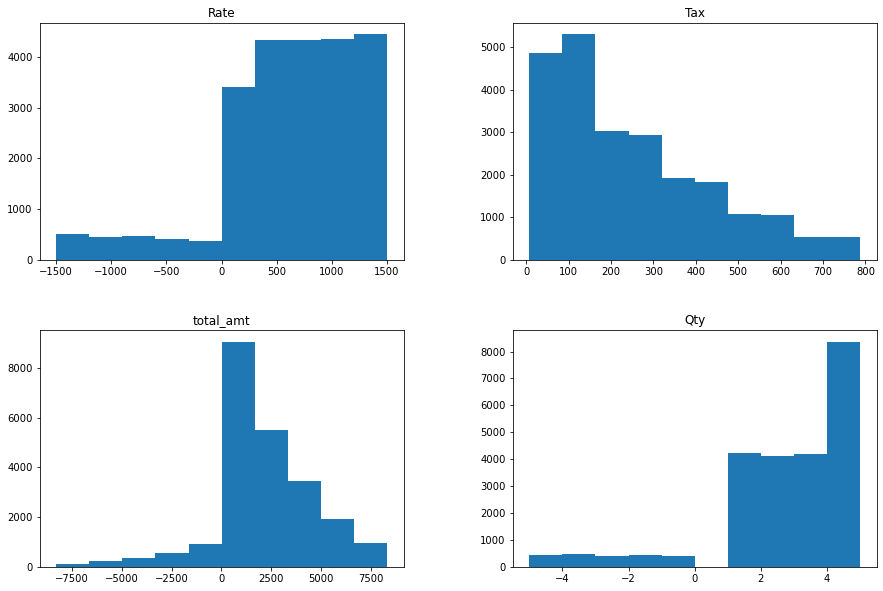

In [19]:
customer_final.loc[:,['Rate','Tax','total_amt','Qty']].hist(grid=False,figsize=(15,10))

In [20]:
customer_final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,2/1/1970,M,4.00,63314547725,268408,26-04-2012,1,1,1,806,84.63,890.63,Flagship store,1,Clothing,1,Women


In [21]:
customer_final.shape

(23053, 18)

In [22]:
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
count,23053,23044,23053,23053,23053,23053
unique,3987,2,1129,4,6,18
top,27-12-1988,M,13-07-2011,e-Shop,Books,Women
freq,32,11811,35,9311,6069,3048


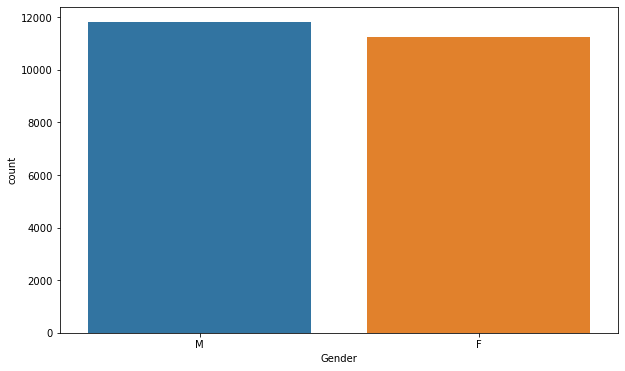

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x=customer_final['Gender'])
plt.show()

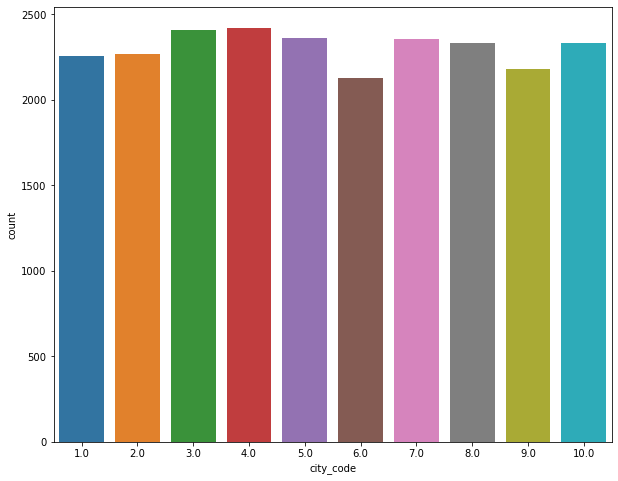

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x=customer_final['city_code'])
plt.show()

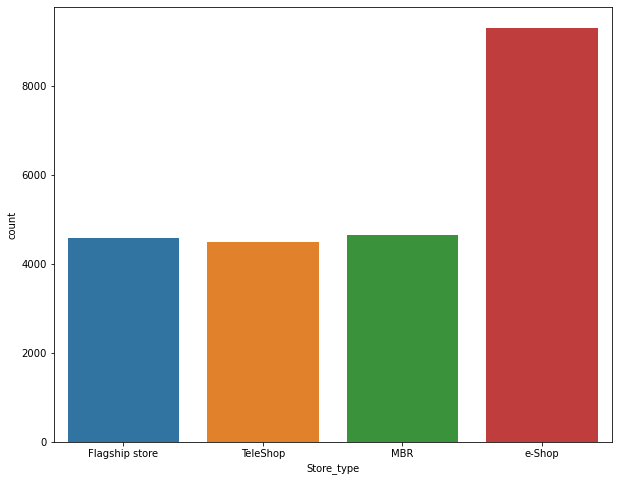

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x=customer_final['Store_type'])
plt.show()

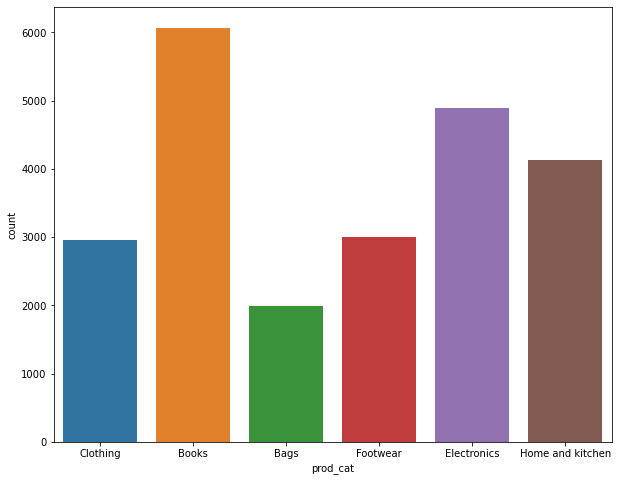

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x=customer_final['prod_cat'])
plt.show()

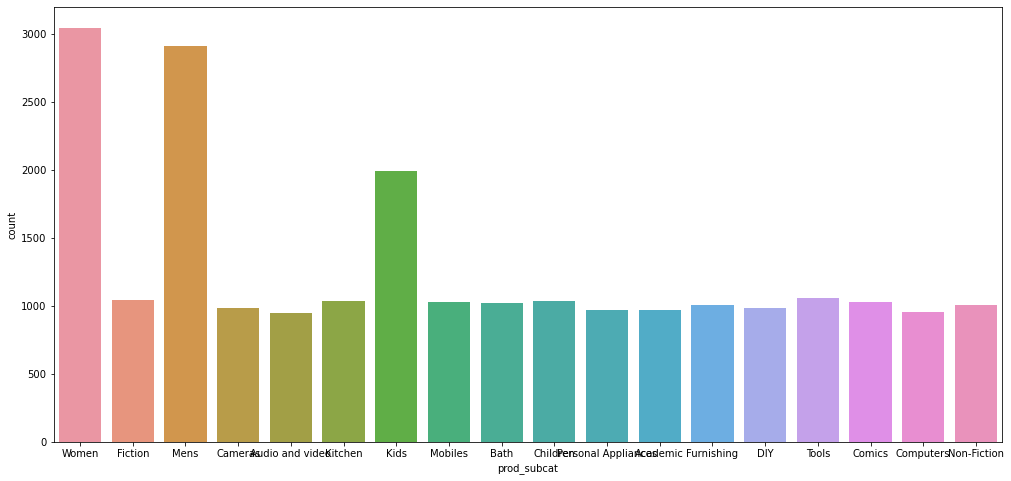

In [27]:
plt.figure(figsize=(17,8))
sns.countplot(x=customer_final['prod_subcat'])
plt.show() 

### 4. Calculate the following information using the merged dataset 
####      a. Time period of the available transaction data

In [28]:
customer_final.sort_values(by="tran_date")

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
17272,270192,1/6/1987,F,4.00,47933752822,270192,1/1/2012,3,1,4,215,90.30,950.30,e-Shop,1,Clothing,3,Kids
18780,270397,7/10/1988,F,3.00,94167232406,270397,1/1/2012,10,6,4,619,259.98,2735.98,e-Shop,6,Home and kitchen,10,Kitchen
3132,275091,26-03-1973,F,2.00,66464587778,275091,1/1/2012,8,3,5,94,49.35,519.35,Flagship store,3,Electronics,8,Personal Appliances
1285,271485,1/5/1971,M,10.00,14575776679,271485,1/1/2012,11,5,2,1014,212.94,2240.94,e-Shop,5,Books,11,Children
12457,268571,25-05-1982,F,2.00,66067413087,268571,1/1/2012,9,3,2,693,145.53,1531.53,e-Shop,3,Electronics,9,Cameras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747,275043,8/11/1972,M,4.00,90647756252,275043,9/9/2013,3,2,5,1489,781.73,8226.73,TeleShop,2,Footwear,3,Women
21117,268137,19-01-1991,F,8.00,28914471254,268137,9/9/2013,2,6,1,1493,156.76,1649.77,e-Shop,6,Home and kitchen,2,Furnishing
17951,273521,15-12-1987,F,4.00,80708718362,273521,9/9/2013,12,5,3,1479,465.88,4902.89,e-Shop,5,Books,12,Academic
4230,275186,6/5/1974,F,3.00,29866196355,275186,9/9/2013,6,5,4,866,363.72,3827.72,MBR,5,Books,6,DIY


In [29]:
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],infer_datetime_format=True)

min_date = customer_final["tran_date"].min()

max_date = customer_final["tran_date"].max()

print("Time period of the available transaction data is from "+ pd.Timestamp.strftime(min_date,format="%d-%m-%Y") + " to " + pd.Timestamp.strftime(max_date,format="%d-%m-%Y"))

C:\Users\PRABHAT\AppData\Local\Temp\ipykernel_4124\2528841853.py:1: UserWarning: Parsing '26-04-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],infer_datetime_format=True)
C:\Users\PRABHAT\AppData\Local\Temp\ipykernel_4124\2528841853.py:1: UserWarning: Parsing '13-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],infer_datetime_format=True)
C:\Users\PRABHAT\AppData\Local\Temp\ipykernel_4124\2528841853.py:1: UserWarning: Parsing '14-08-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],infer_datetime_format=True)
C:\Users\PRABHAT\AppData\Local\Temp\ipykernel_4124\2528841853.py:1: UserWarning: Parsing

C:\Users\PRABHAT\AppData\Local\Temp\ipykernel_4124\2528841853.py:1: UserWarning: Parsing '23-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],infer_datetime_format=True)
C:\Users\PRABHAT\AppData\Local\Temp\ipykernel_4124\2528841853.py:1: UserWarning: Parsing '29-07-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],infer_datetime_format=True)
C:\Users\PRABHAT\AppData\Local\Temp\ipykernel_4124\2528841853.py:1: UserWarning: Parsing '25-08-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],infer_datetime_format=True)
C:\Users\PRABHAT\AppData\Local\Temp\ipykernel_4124\2528841853.py:1: UserWarning: Parsing

C:\Users\PRABHAT\AppData\Local\Temp\ipykernel_4124\2528841853.py:1: UserWarning: Parsing '26-12-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],infer_datetime_format=True)
C:\Users\PRABHAT\AppData\Local\Temp\ipykernel_4124\2528841853.py:1: UserWarning: Parsing '21-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],infer_datetime_format=True)
C:\Users\PRABHAT\AppData\Local\Temp\ipykernel_4124\2528841853.py:1: UserWarning: Parsing '24-02-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"],infer_datetime_format=True)
C:\Users\PRABHAT\AppData\Local\Temp\ipykernel_4124\2528841853.py:1: UserWarning: Parsing

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


#### b. Count of transactions where the total amount of transaction was negative

In [30]:
negative_transaction = customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()
print("Count of transactions where the total amount of transaction was negative is",negative_transaction)

Count of transactions where the total amount of transaction was negative is 2177


In [31]:
product_gender = customer_final.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()
product_gender

,Gender,prod_cat,Qty
0,F,Bags,2362
1,F,Books,7070
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3716
5,F,Home and kitchen,4895
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6476


### 5. Analyze which product categories are more popular among females vs male customers.

In [32]:
product_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [33]:
customer_group = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)

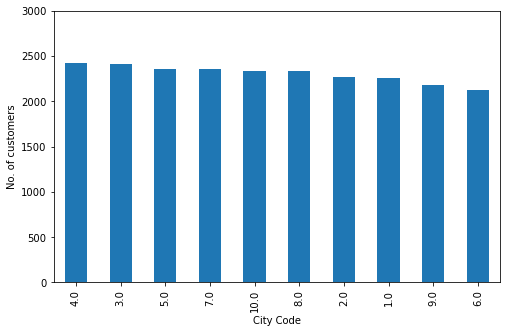

In [34]:
plt.figure(figsize=(8,5))
customer_group.plot(kind="bar")
plt.xlabel("City Code")
plt.ylabel("No. of customers")
plt.yticks(np.arange(0, 3500, step=500))
plt.show()

In [35]:
percentage = round((customer_group[4.0] / customer_group.sum()) * 100,2)
print("City code 4.0 has the maximum customers and the percentage of customers from that city is ",percentage)

City code 4.0 has the maximum customers and the percentage of customers from that city is  10.51


### 7. Which store type sells the maximum products by value and by quantity?

In [36]:
customer_final.groupby(["Store_type"])[["Qty","Rate"]].sum().sort_values(by="Qty",ascending=False)

,Qty,Rate
Store_type,,
e-Shop,22763,5941001
MBR,11194,2953253
Flagship store,11133,2941557
TeleShop,10984,2834420


In [37]:
customer_final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,2/1/1970,M,4.00,63314547725,268408,2012-04-26,1,1,1,806,84.63,890.63,Flagship store,1,Clothing,1,Women


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [38]:
store_group = round(customer_final.pivot_table(index = "prod_cat",columns="Store_type", values="total_amt", aggfunc='sum'),2)

store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.84,848678.68,789181.06,1616300.08
Books,2488205.85,2496039.19,2545005.06,5293443.93
Clothing,1194423.23,1287686.34,1241834.36,2527193.56
Electronics,2215136.04,2107514.56,1973338.84,4426474.20
Footwear,1234806.56,1112163.72,1235719.29,2637084.71
Home and kitchen,1712567.68,1822403.57,1579702.48,3324319.57


In [39]:
store_group.loc[["Clothing","Electronics"],"Flagship store"]

prod_cat
Clothing      1194423.23
Electronics   2215136.04
Name: Flagship store, dtype: float64

In [40]:
store_group.loc[["Clothing","Electronics"],"Flagship store"].sum()

3409559.27

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [41]:
gender_group = round(customer_final.pivot_table(index = "prod_cat",columns="Gender", values="total_amt", aggfunc='sum'),2)

male_earning = gender_group.loc["Electronics","M"]

print("The total amount earned from Male customers under the Electronics category is",male_earning)

The total amount earned from Male customers under the Electronics category is 5703109.42


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [42]:
pos_trans = customer_final.loc[customer_final["total_amt"]>0,:]

pos_trans

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code_x,Qty,Rate,Tax,total_amt,Store_type,prod_cat_code_y,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,2/1/1970,M,4.00,63314547725,268408,2012-04-26,1,1,1,806,84.63,890.63,Flagship store,1,Clothing,1,Women
1,268408,2/1/1970,M,4.00,87243835584,268408,2014-01-13,7,5,5,187,98.17,1033.17,TeleShop,5,Books,7,Fiction
2,268408,2/1/1970,M,4.00,12644501524,268408,2012-08-14,4,4,3,321,101.11,1064.12,TeleShop,4,Bags,4,Women
3,268408,2/1/1970,M,4.00,56844530655,268408,2012-10-14,1,2,5,1175,616.88,6491.88,MBR,2,Footwear,1,Mens
4,268408,2/1/1970,M,4.00,56902862040,268408,2013-01-30,9,3,5,868,455.70,4795.70,e-Shop,3,Electronics,9,Cameras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.00,71369029396,269626,2011-10-18,12,6,1,638,66.99,704.99,e-Shop,6,Home and kitchen,12,Tools
23049,269626,27-12-1992,F,5.00,94134051896,269626,2011-07-07,3,1,3,1078,339.57,3573.57,MBR,1,Clothing,3,Kids
23050,274308,29-12-1992,F,5.00,58160544337,274308,2012-04-07,12,5,5,588,308.70,3248.70,e-Shop,5,Books,12,Academic
23051,274308,29-12-1992,F,5.00,26208690928,274308,2012-10-22,1,2,2,898,188.58,1984.58,MBR,2,Footwear,1,Mens


In [43]:
unique_trans = pos_trans.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()

unique_trans

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [44]:
unique_trans_count = unique_trans.groupby('customer_Id')['transaction_id'].count().reset_index()

unique_trans_count.head()

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8


In [45]:
unique_trans_count[unique_trans_count['transaction_id'] > 10]

,customer_Id,transaction_id


In [46]:
print('There are no unique transactions greater than 10')

There are no unique transactions greater than 10


### 11. For all customers aged between 25 - 35, find out:
####      a. What was the total amount spent for “Electronics” and “Books” product categories?

In [47]:
now = pd.Timestamp('now')
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'],format='%d/%m/%y',infer_datetime_format=True)    
customer_final['DOB'] = customer_final['DOB'].where(customer_final['DOB'] < now, customer_final['DOB'] - np.timedelta64(100, 'Y'))   
customer_final['AGE'] = (now - customer_final['DOB']).astype('<m8[Y]')



customer_final['Age_cat'] = pd.cut(customer_final['AGE'],bins=[24,35,46,57],labels=['25-35','36-46','47-57'],include_lowest=True)

customer_25_35 = customer_final.groupby(['Age_cat','prod_cat'])['total_amt'].sum()

customer_25_35.loc['25-35',['Books','Electronics']]

print("Total amount spent on 'Electronics' and 'Books' product categories is", 
      customer_25_35.loc['25-35',['Books','Electronics']].sum().round(2))

C:\Users\PRABHAT\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PRABHAT\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PRABHAT\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-01-1970' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PRABHAT\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-01-1970' in DD/MM/YYYY format. Provide format o

C:\Users\PRABHAT\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15-07-1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PRABHAT\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16-07-1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PRABHAT\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-07-1980' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PRABHAT\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18-07-1980' in DD/MM/YYYY format. Provide format o

Total amount spent on 'Electronics' and 'Books' product categories is 6264874.85


C:\Users\PRABHAT\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-03-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PRABHAT\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22-03-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PRABHAT\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-03-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\PRABHAT\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-03-1990' in DD/MM/YYYY format. Provide format o

#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [48]:
customer_total_amount_25_35 = customer_final[customer_final['Age_cat']=='25-35']

total_amount = customer_total_amount_25_35[(customer_total_amount_25_35['tran_date'] >='2014-01-01') & (customer_total_amount_25_35['tran_date'] <='2014-03-01')]
total_amount['total_amt'].sum()
print('The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is',
      total_amount['total_amt'].sum())

The total amount spent by customers aged 25-35 between 1st Jan 2014 to 1st Mar 2014 is 434790.98
